In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [62]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)

In [63]:
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [64]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])

In [65]:
data.columns = header

In [66]:
data["Dataset 1"]

val,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


In [67]:
#data.to_latex('hola.tex')

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [69]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions
    
    return X, Y, X_pred, Y_pred

## Inciso (A)

El artículo muestra la necesidad de visualizar los datos. A partir de cuatro conjuntos de datos distintos que poseen las mismas estadísticas descriptivas, pero son complentamente distintos, demostrando así que unicamente con calculos númericos no es posible realizar un análisis correcto de los datos. Es entonces necesario utilizar herramientas de visualización en compañía de estadísticas descriptivas para poder realizar un analisis más concreto de la información.

## Inciso (B)

Realizar los cálculos descritos en la transparencia 11 de la presentación Intro.

In [70]:
linear_regressor = LinearRegression()  # create object for the class

# Dataset 1
coeficientes = []
correlaciones = []

for i in range(1,5):
    dataset = "Dataset {}".format(i)
    mean_x = data[dataset]["x"].mean()
    var_x = data[dataset]["x"].var()
    mean_y = data[dataset]["y"].mean()
    var_y = data[dataset]["y"].var()
    corr_xy = data[dataset].corr()
    linear_regressor.fit(data[dataset]["x"].values.reshape(-1, 1), data[dataset]["y"].values.reshape(-1, 1))  # perform linear regression
    m = linear_regressor.coef_
    b = linear_regressor.intercept_
    Y_pred = linear_regressor.predict(data[dataset]["x"].values.reshape(-1, 1))
    r2 = r2_score(data[dataset]["y"].values.reshape(-1, 1), Y_pred)
    coeficientes.append((mean_x, var_x, mean_y, var_y, m[0][0], b[0], r2))
    correlaciones.append(corr_xy.values)
    
    

In [71]:
descripcion = pd.DataFrame(coeficientes, columns=['Mean x','Var x', 'Mean y', 'Var y', 'beta 1(regresión)', 'beta 0(regresión)', 'r2'], index = ['Dataset 1','Dataset 2','Dataset 3','Dataset 4'])

In [72]:
descripcion

,Mean x,Var x,Mean y,Var y,beta 1(regresión),beta 0(regresión),r2
Dataset 1,9.0,11.0,7.500909,4.127269,0.500091,3.000091,0.666542
Dataset 2,9.0,11.0,7.500909,4.127629,0.500000,3.000909,0.666242
Dataset 3,9.0,11.0,7.500000,4.122620,0.499727,3.002455,0.666324
Dataset 4,9.0,11.0,7.500909,4.123249,0.499909,3.001727,0.666707


In [73]:
print("Matrices de correlación")

for i,c in enumerate(correlaciones):
    print("\nDataset {}".format(i))
    aux = pd.DataFrame(c, columns=['x{}'.format(i+1),'y{}'.format(i+1)], index=['x{}'.format(i+1),'y{}'.format(i+1)])
    print(aux)

Matrices de correlación

Dataset 0
          x1        y1
x1  1.000000  0.816421
y1  0.816421  1.000000

Dataset 1
          x2        y2
x2  1.000000  0.816237
y2  0.816237  1.000000

Dataset 2
          x3        y3
x3  1.000000  0.816287
y3  0.816287  1.000000

Dataset 3
          x4        y4
x4  1.000000  0.816521
y4  0.816521  1.000000


## Inciso (C)

Realizar los cálculos descritos en la transparencia 11 de la presentación Intro.

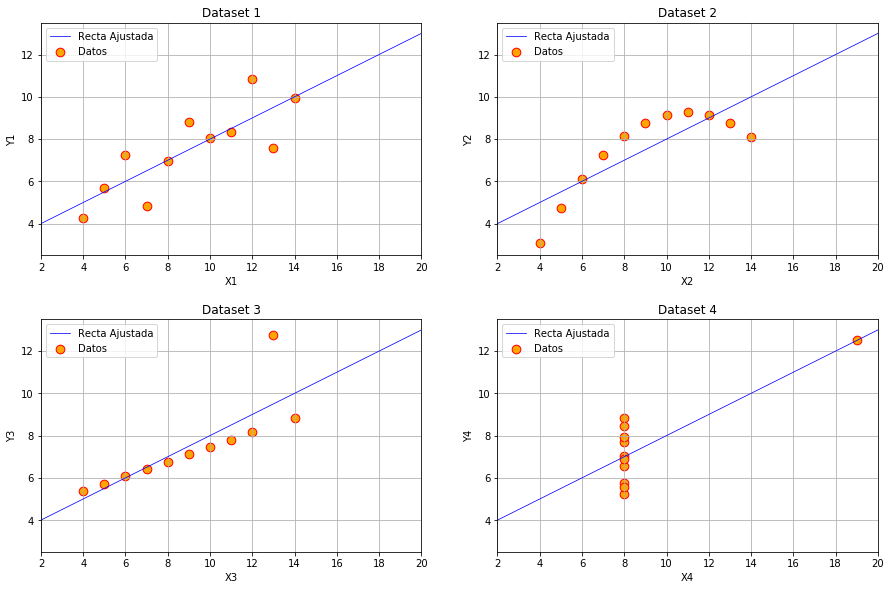

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

n = 1
i = 0
for a in axes:
    
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.set_title("Dataset {}".format(n))
        
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.legend(["Recta Ajustada", "Datos"])
        ax.set_xlabel("X{}".format(n))
        ax.set_ylabel("Y{}".format(n))
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        ax.grid()
        
        n += 1
        i += 2